In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from typing import Annotated
from langgraph.graph.message import add_messages 

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['GROQ_API_KEY']=os.getenv('GROQ_API_KEY')


In [4]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="openai/gpt-oss-120b")

In [5]:
llm.invoke("Hi")

AIMessage(content='Hello! 👋 How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says "Hi". We need to respond appropriately. No special constraints. Just greet and ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 72, 'total_tokens': 117, 'completion_time': 0.094046372, 'completion_tokens_details': {'reasoning_tokens': 25}, 'prompt_time': 0.002763946, 'prompt_tokens_details': None, 'queue_time': 0.049888504, 'total_time': 0.096810318}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e10890e4b9', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019bf0f5-593b-70b3-b386-584a53fc372a-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 72, 'output_tokens': 45, 'total_tokens': 117, 'output_token_details': {'reasoning': 25}})

In [6]:
#Now starting to make the nodes

In [7]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

In [8]:
graph=StateGraph(State)
graph.add_node("superbot",superbot)

graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

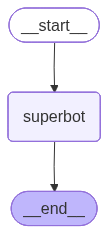

In [9]:
builder=graph.compile()
from IPython.display import display,Image
display(Image(builder.get_graph().draw_mermaid_png()))

In [10]:
config={"configurable":{"thread_id":"1"}}
builder.invoke({"messages":"My name is paras and i like cricket\n"},config)

{'messages': [HumanMessage(content='My name is paras and i like cricket\n', additional_kwargs={}, response_metadata={}, id='9cdd5fa6-a96a-47e3-8bba-53135e739d9f'),
  AIMessage(content="Nice to meet you, Paras! 🎉 Cricket is such an exciting sport—there’s always something happening on the field. Do you have a favorite team or player? Or perhaps a memorable match that you love to talk about? I'd love to hear more!", additional_kwargs={'reasoning_content': 'The user says: "My name is paras and i like cricket". Likely they want a response. There\'s no request for disallowed content. So respond politely, maybe ask about cricket preferences.'}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 80, 'total_tokens': 181, 'completion_time': 0.209937484, 'completion_tokens_details': {'reasoning_tokens': 40}, 'prompt_time': 0.003341255, 'prompt_tokens_details': None, 'queue_time': 0.157877656, 'total_time': 0.213278739}, 'model_name': 'openai/gpt-oss-120b', 'system_finge

In [15]:
#Straming th  responses with Streaming method 


# Step 2: Add nodes, edges, or logic to your graph
# (this depends on your workflow setup)

# Step 3: Stream responses
config = {"configurable": {"thread_id": "2"}}
for chunk in builder.stream(
    {"messages": "Hi my name is paras and i like playing cricket"},
    config_stream_mode="updates"
):
    print(chunk)

{'superbot': {'messages': [AIMessage(content='Hey Paras! 👋 Great to meet you.  \n\nCricket’s such a fun sport—whether you’re into batting, bowling, or just cheering from the stands. Do you have a favorite team or player? Or maybe you enjoy playing a particular format (Test, ODI, T20)? I’d love to hear more about your cricket adventures!', additional_kwargs={'reasoning_content': 'We need to respond. The user introduced themselves. Probably respond politely, ask about cricket preferences, etc. No disallowed content. Just a friendly response.'}, response_metadata={'token_usage': {'completion_tokens': 111, 'prompt_tokens': 81, 'total_tokens': 192, 'completion_time': 0.232101092, 'completion_tokens_details': {'reasoning_tokens': 32}, 'prompt_time': 0.003212162, 'prompt_tokens_details': None, 'queue_time': 0.052556708, 'total_time': 0.235313254}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_626f3fc5e0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None,

In [16]:
# asynchronous (async) streaming allows applications to receive and
#  process output from a Large Language Model (LLM) or a complex chain in real-time, 
#  token by token, without blocking the entire application while waiting for the full response.
#   This significantly improves the user experience by reducing perceived latency, especially in chat applications. 

In [23]:
config={"configurable":{"thread_id":"3"}}
async for event in builder.astream_events({"messages":"Hi my name is paras an i like to play cricket"}):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi my name is paras an i like to play cricket'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '019bf109-5c0a-7e31-ab75-ed2745d588e4', 'metadata': {}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is paras an i like to play cricket', additional_kwargs={}, response_metadata={}, id='cd84dd3f-1d71-4780-9133-b0ac70997f31')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': '019bf109-5c0d-7022-877e-464bf5a89938', 'metadata': {'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:ded1a22b-3d47-4418-b922-55c51fa319f0'}, 'parent_ids': ['019bf109-5c0a-7e31-ab75-ed2745d588e4']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is paras an i like to play cricket', additional_kwargs={}, respo